# Level 1 Basic Notebook

Simple cleaning, EDA, and basic charts on your datasets.

Generated on 2025-09-29 19:07:11 UTC.


In [ ]:

from pathlib import Path

iris_path = Path(r"C:\Users\mfgdiags1\Downloads\1) iris.csv")
stock_path = Path(r"C:\Users\mfgdiags1\Downloads\2) Stock Prices Data Set.csv")
senti_path = Path(r"C:\Users\mfgdiags1\Downloads\3) Sentiment dataset.csv")
house_path = Path(r"C:\Users\mfgdiags1\Downloads\4) house Prediction Data Set.csv")

def load_csv(path):
    return pd.read_csv(path, encoding="utf-8")

iris = load_csv(iris_path)
stock = load_csv(stock_path)
senti = load_csv(senti_path)
house = load_csv(house_path)

display(iris.head())
display(stock.head())
display(senti.head())
display(house.head())

print("Shapes:", house.shape, stock.shape, senti.shape, iris.shape)


# Task 1 Data Cleaning and Preprocessing

In [10]:

import pandas as pd
import numpy as np

def clean_dataframe(df):
    df = df.copy()
    for c in df.select_dtypes(include=['object']).columns:
        df[c] = df[c].astype(str).str.strip()
    before = len(df)
    df = df.drop_duplicates()
    print("Removed duplicates:", before - len(df))
    for c in df.columns:
        lc = c.lower()
        if "date" in lc or "time" in lc:
            df[c] = pd.to_datetime(df[c], errors='coerce')
    num_cols = df.select_dtypes(include=[np.number]).columns
    obj_cols = df.select_dtypes(exclude=[np.number]).columns
    for c in num_cols:
        if df[c].isna().any():
            df[c] = df[c].fillna(df[c].median())
    for c in obj_cols:
        if df[c].isna().any():
            mode_val = df[c].mode(dropna=True)
            df[c] = df[c].fillna(mode_val.iloc[0] if not mode_val.empty else "unknown")
    return df

house_clean = clean_dataframe(house)
stock_clean = clean_dataframe(stock)
senti_clean = clean_dataframe(senti)
iris_clean = clean_dataframe(iris)

display(house_clean.head())
display(stock_clean.head())
display(senti_clean.head())
display(iris_clean.head())


Removed duplicates: 0
Removed duplicates: 0
Removed duplicates: 0
Removed duplicates: 3


,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78....
1,0.02729 0.00 7.070 0 0.4690 7.1850 61....
2,0.03237 0.00 2.180 0 0.4580 6.9980 45....
3,0.06905 0.00 2.180 0 0.4580 7.1470 54....
4,0.02985 0.00 2.180 0 0.4580 6.4300 58....


,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park!,unknown,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning.,unknown,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪,unknown,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway!,unknown,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight.,unknown,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Task 2 Exploratory Data Analysis

Summary for house

Categorical/text columns:


,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
count,505
unique,505
top,0.02731 0.00 7.070 0 0.4690 6.4210 78....
freq,1


Summary for stock

Numeric columns:


,open,high,low,close,volume
count,497472.000000,497472.000000,497472.000000,497472.000000,4.974720e+05
mean,86.351802,87.132215,85.552127,86.369082,4.253611e+06
std,101.470156,102.311276,100.570184,101.472407,8.232139e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,41.690000,42.090000,41.280000,41.703750,1.080166e+06
50%,64.970000,65.560000,64.353700,64.980000,2.084896e+06
75%,98.410000,99.230000,97.580000,98.420000,4.271928e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08



Categorical/text columns:


,symbol
count,497472
unique,505
top,AAL
freq,1007



Datetime columns:


,min,max,count
date,2014-01-02,2017-12-29,497472


Summary for sentiment

Numeric columns:


,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000



Categorical/text columns:


,Text,Sentiment,User,Platform,Hashtags,Country
count,732,732,732,732,732,732
unique,706,1,670,3,692,33
top,"A compassionate rain, tears of empathy falling...",unknown,ForestDreamer,Instagram,#Playful #CarnivalEscapade,USA
freq,3,732,3,258,3,188



Datetime columns:


,min,max,count
Timestamp,2010-05-15 15:30:00,2023-10-22 20:45:00,732


Summary for iris

Numeric columns:


,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



Categorical/text columns:


,species
count,147
unique,3
top,versicolor
freq,50


No correlation heatmap for house


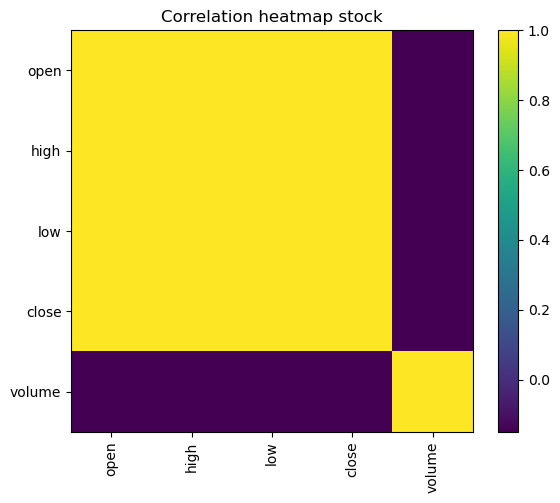

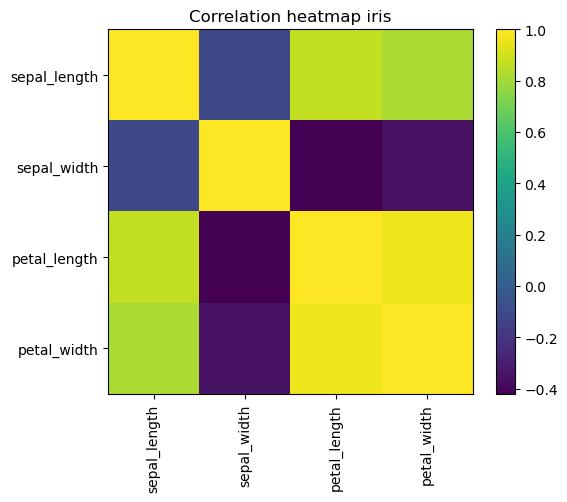

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def quick_describe(df, name):
    print(f"Summary for {name}")

    num = df.select_dtypes(include=[np.number])
    obj = df.select_dtypes(include=['object'])
    dt  = df.select_dtypes(include=['datetime'])

    if not num.empty:
        print("\nNumeric columns:")
        display(num.describe())

    if not obj.empty:
        print("\nCategorical/text columns:")
        display(obj.describe())

    if not dt.empty:
        print("\nDatetime columns:")
        display(dt.agg(['min', 'max', 'count']).T)

def correlation_heatmap(df, title):
    num = df.select_dtypes(include=[np.number])
    if num.shape[1] < 2:
        print(f"No correlation heatmap for {title}")
        return
    corr = num.corr()
    plt.figure(figsize=(6,5))
    plt.imshow(corr, interpolation='nearest')
    plt.title(f"Correlation heatmap {title}")
    plt.colorbar()
    ticks = range(len(num.columns))
    plt.xticks(ticks, num.columns, rotation=90)
    plt.yticks(ticks, num.columns)
    plt.tight_layout()
    plt.show()

# Use the improved describe
quick_describe(house_clean, "house")
quick_describe(stock_clean, "stock")
quick_describe(senti_clean, "sentiment")
quick_describe(iris_clean, "iris")

# Correlations
correlation_heatmap(house_clean, "house")
correlation_heatmap(stock_clean, "stock")
correlation_heatmap(iris_clean, "iris")



# Task 3 Basic Data Visualization

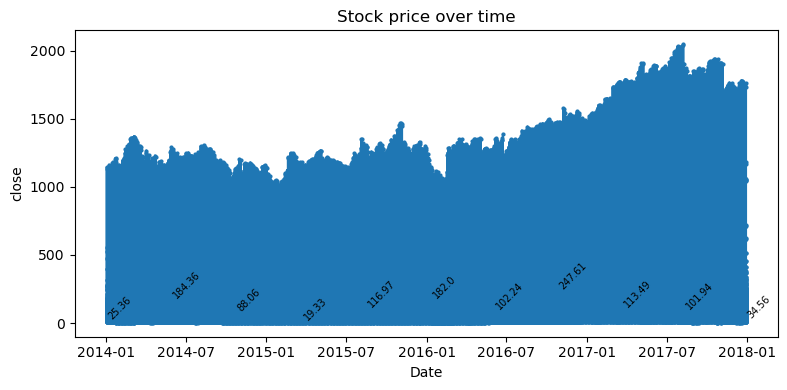

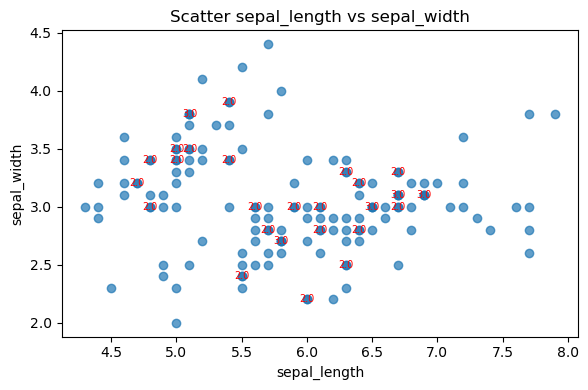

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Histograms with counts for a few numeric columns in house
num_cols = house_clean.select_dtypes(include=[np.number]).columns[:5]
for col in num_cols:
    plt.figure(figsize=(6,4))
    counts, bins, patches = plt.hist(house_clean[col].dropna(), bins=30, edgecolor="black")
    # label each bar with its count
    for i in range(len(counts)):
        if counts[i] > 0:
            plt.text(bins[i] + (bins[i+1]-bins[i])/2, counts[i], str(int(counts[i])),
                     ha="center", va="bottom", fontsize=8)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# Line chart for stock price with counts (just index positions)
date_col = None
price_col = None
for c in stock_clean.columns:
    if "date" in c.lower():
        date_col = c
        break
for c in stock_clean.columns:
    if c.lower() in ["close", "adj close", "price"]:
        price_col = c
        break

if date_col and price_col:
    sc = stock_clean.copy()
    sc[date_col] = pd.to_datetime(sc[date_col], errors='coerce')
    sc = sc.dropna(subset=[date_col]).sort_values(date_col)
    plt.figure(figsize=(8,4))
    plt.plot(sc[date_col], sc[price_col], marker="o", markersize=2)
    # add a few labels (every Nth point)
    step = max(1, len(sc)//10)
    for i in range(0, len(sc), step):
        plt.text(sc[date_col].iloc[i], sc[price_col].iloc[i],
                 str(round(sc[price_col].iloc[i],2)),
                 fontsize=7, rotation=45)
    plt.title("Stock price over time")
    plt.xlabel("Date")
    plt.ylabel(price_col)
    plt.tight_layout()
    plt.show()

# Scatter plot for iris with counts per unique x,y pair
iris_num = iris_clean.select_dtypes(include=[np.number])
if iris_num.shape[1] >= 2:
    xcol, ycol = iris_num.columns[:2]
    plt.figure(figsize=(6,4))
    plt.scatter(iris_num[xcol], iris_num[ycol], alpha=0.7)
    plt.title(f"Scatter {xcol} vs {ycol}")
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    # annotate counts of overlapping points
    counts = iris_num.groupby([xcol, ycol]).size().reset_index(name="count")
    for _, row in counts.iterrows():
        if row["count"] > 1:
            plt.text(row[xcol], row[ycol], str(row["count"]),
                     ha="center", va="center", fontsize=7, color="red")
    plt.tight_layout()
    plt.show()
